In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [2]:
import matplotlib.pyplot as plt
import numpy as np

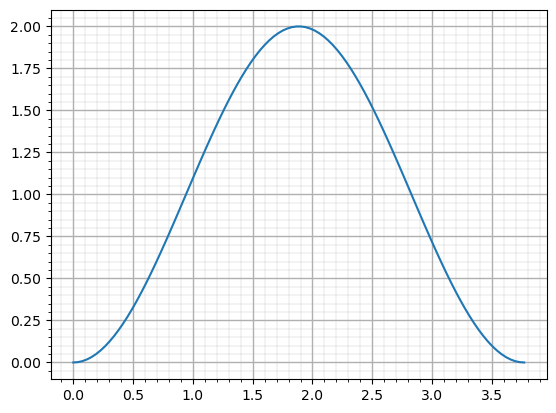

In [17]:
# Speed function depending on the angle and arc distance
l = 0.6
max_speed = 1
dist = np.linspace(0, 2*np.pi * l, 100)
theta = dist/l

speed = (1 -  np.cos(theta)) * max_speed

plt.grid(which = "major", linewidth = 1)
plt.grid(which = "minor", linewidth = 0.2)
plt.minorticks_on()
plt.plot(dist,speed)

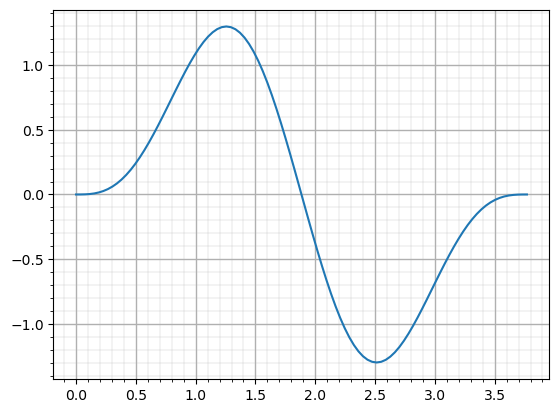

In [18]:
# Acceleration function depending on the angle and arc distance
l = 0.6
target_zone_radius = 0.1
max_speed = 1

dist = np.linspace(0, 2*np.pi * l, 100)
theta = dist/l

speed = (1 -  np.cos(theta)) * max_speed
accel = np.sin(theta) * speed *  max_speed

plt.grid(which = "major", linewidth = 1)
plt.grid(which = "minor", linewidth = 0.2)
plt.minorticks_on()
plt.plot(dist,accel)

In [21]:
# Acceleration function depending on the angle and arc distance
l = 0.6
target_zone_radius = 0.1
max_speed = 1

dist = target_zone_radius
theta = dist/l

speed = (1 -  np.cos(theta)) * max_speed
accel = np.sin(theta) * speed *  max_speed

print(speed)
print(accel)

0.013856768437074951
0.0022987842953389116


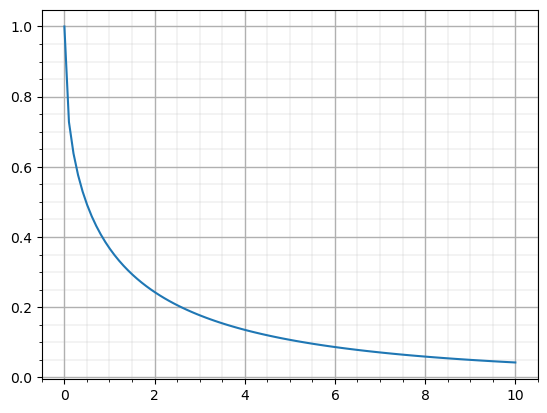

In [5]:
dist = np.linspace(0, 10, 100)
y = np.exp(-np.sqrt(abs(dist)))

plt.grid(which = "major", linewidth = 1)
plt.grid(which = "minor", linewidth = 0.2)
plt.minorticks_on()
plt.plot(dist,y)